# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [188]:
# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    confusion_matrix,
    make_scorer
)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

## Loading the Dataset

In [189]:
data = pd.read_csv("C:/Users/samyu/Documents/PGP - DSBA/Supervised Learning Classification/Project/INNHotelsGroup (1).csv")

## Data Overview

- Observations
- Sanity checks

In [190]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [191]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [6]:
data.required_car_parking_space.value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

In [7]:
data.shape

(36275, 19)

There are 36275 rows and 19 columns in the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Out of the 19 columns, 5 columns are of object type and the remaining 14 are of numerical type.

In [9]:
## Checking the statistical summary of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


We observe that by default , the statistical summary is shown only for all the numerical columns.

In [10]:
#checking the statistical summary for non numerical columns
data.describe(exclude='number').T

,count,unique,top,freq
Booking_ID,36275,36275,INN00001,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


In [11]:
#We will check for missing values in the data
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [12]:
#we will check for missing values in the data as a percentage
data.isnull().sum()/data.shape[0]*100

Booking_ID                              0.0
no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64

We observe that there are no missing values in the data.

In [13]:
#We will also check for any duplicates in the data.
data.duplicated().sum()

0

This confirms that there are no duplicates. we have completed all observations and sanity checks.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

## Univariate Analysis

In [14]:
## we write a function to get a histogram and boxplot for all the numerical variables
##This function takes the numerical variable as input and returns a boxplot and histogram and will help in making our analysis more efficient and quicker

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2,(ax_box2, ax_hist2)= plt.subplots(nrows = 2,sharex = True,gridspec_kw ={"height_ratios": (0.25,0.75)},figsize=figsize,)
    sns.boxplot(data=data,x=feature,ax= ax_box2,showmeans = True,color = "violet")
    sns.histplot(data=data,x=feature,ax=ax_hist2,kde=kde,bins=bins
    ) if bins else sns.histplot(
        data=data,x=feature,ax=ax_hist2,kde=kde)
    ax_hist2.axvline(data[feature].mean(),color="green",linestyle="--")
    ax_hist2.axvline(data[feature].median(),color="black",linestyle="-")
    

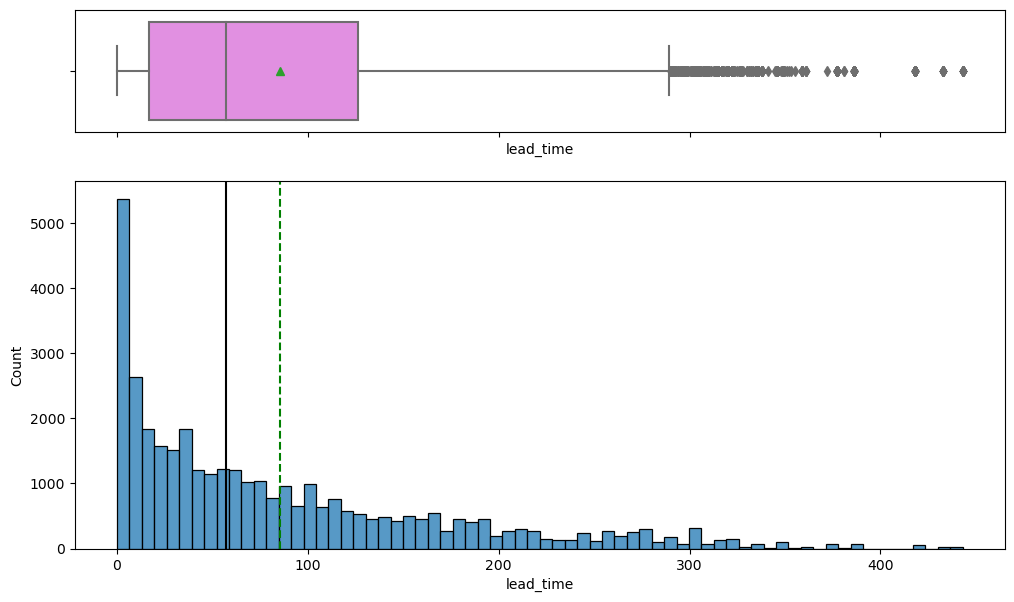

In [15]:
histogram_boxplot(data,"lead_time")

The average lead time seems to be close to 100 which means people approximately book hotel rooms upto three months in advance

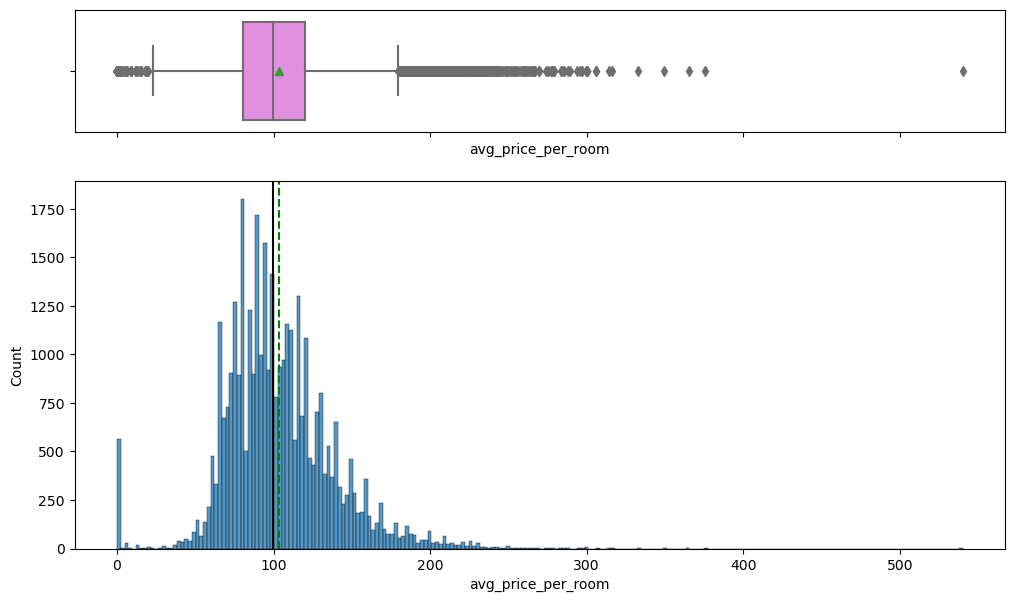

In [16]:
histogram_boxplot(data,"avg_price_per_room")

On an Average the price per room seems to be close to 100 euros but this pricing is dynamic and there are many outliers that go upto 400 euros which maybe during the peak season and as low as 50 euros and below which maybe during the non peak season.

In [17]:
# function to create labeled barplots
# https://moonbooks.org/Articles/How-to-add-text-on-a-bar-with-matplotlib-/

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

# https://www.geeksforgeeks.org/matplotlib-pyplot-annotate-in-python/
# https://towardsdatascience.com/texts-fonts-and-annotations-with-pythons-matplotlib-dfbdea19fc57
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=15,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

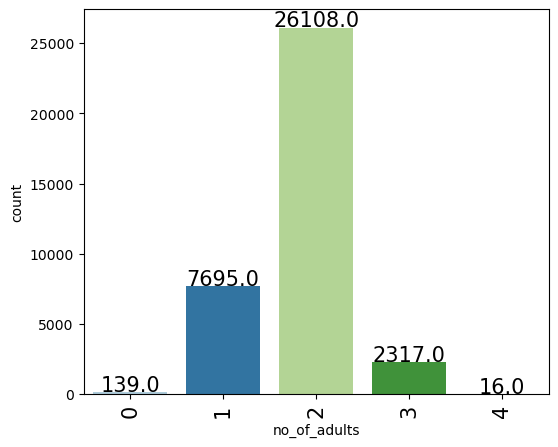

In [18]:
labeled_barplot(data,"no_of_adults")

Most of the times , there are 2 guests per room

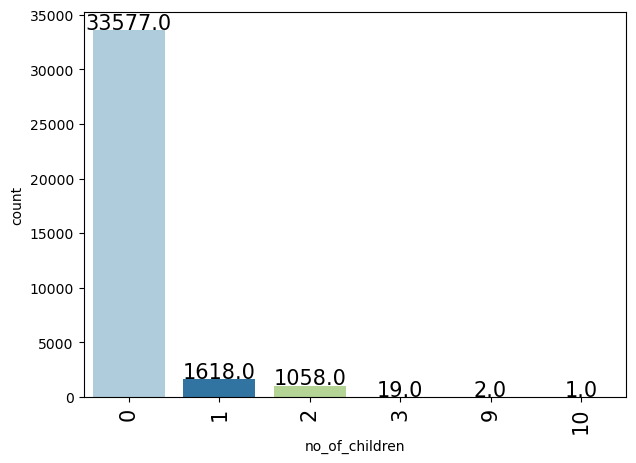

In [19]:
labeled_barplot(data,"no_of_children")

most of the times , there are no children for the rooms booked

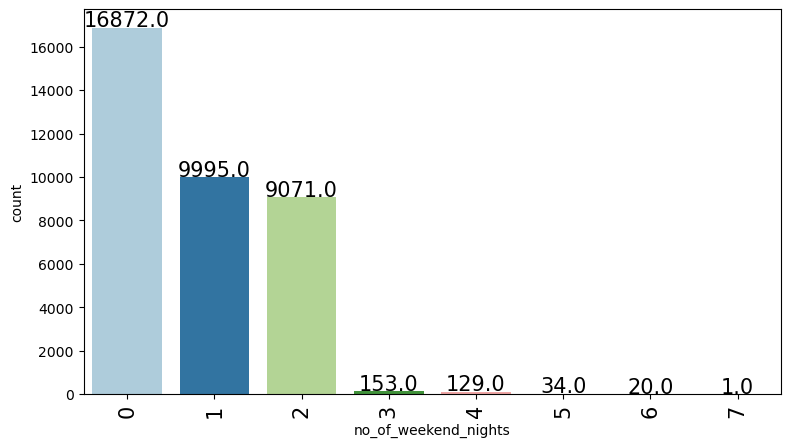

In [20]:
labeled_barplot(data,"no_of_weekend_nights")

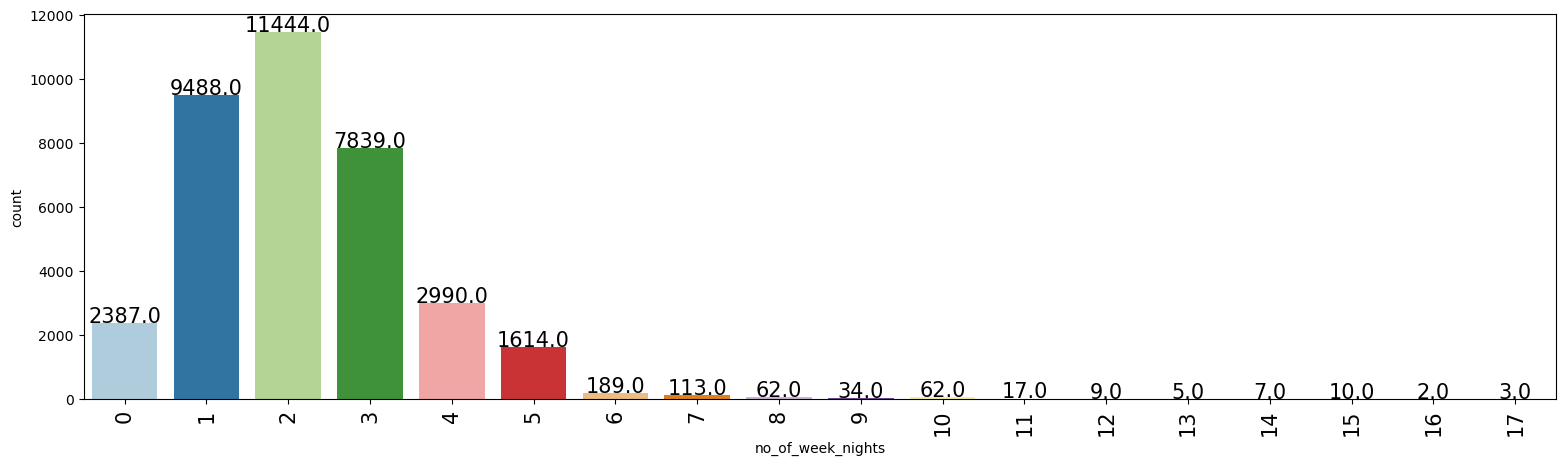

In [21]:
labeled_barplot(data,"no_of_week_nights")

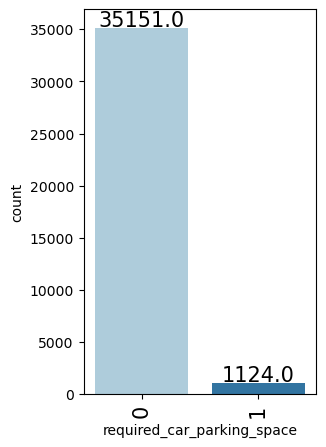

In [22]:
labeled_barplot(data,"required_car_parking_space")

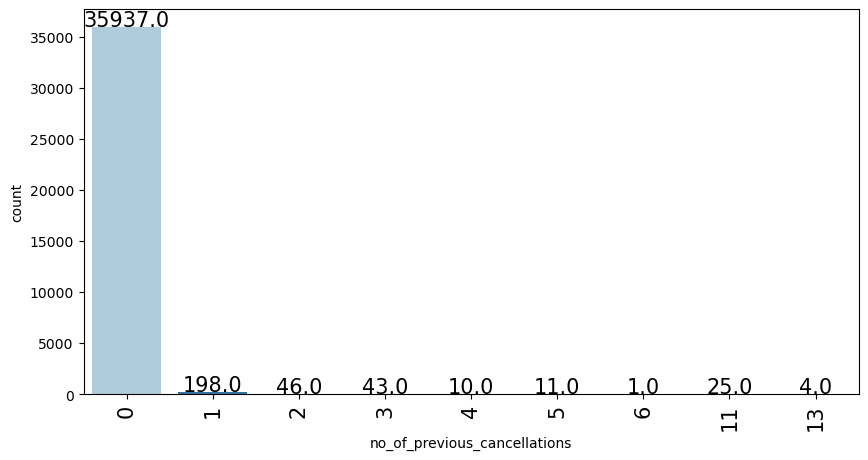

In [23]:
labeled_barplot(data,"no_of_previous_cancellations")

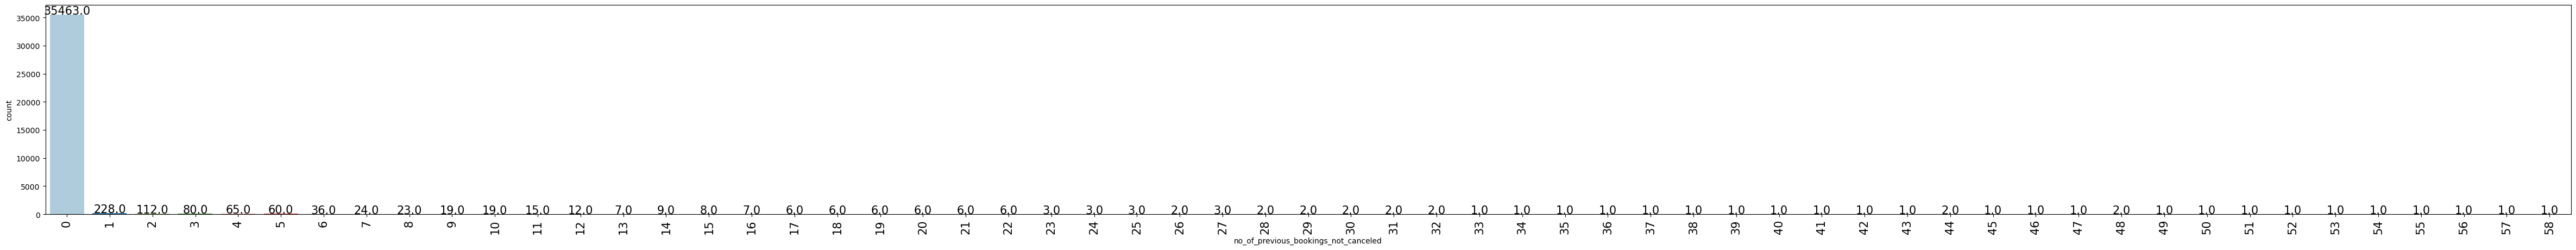

In [24]:
labeled_barplot(data,"no_of_previous_bookings_not_canceled")

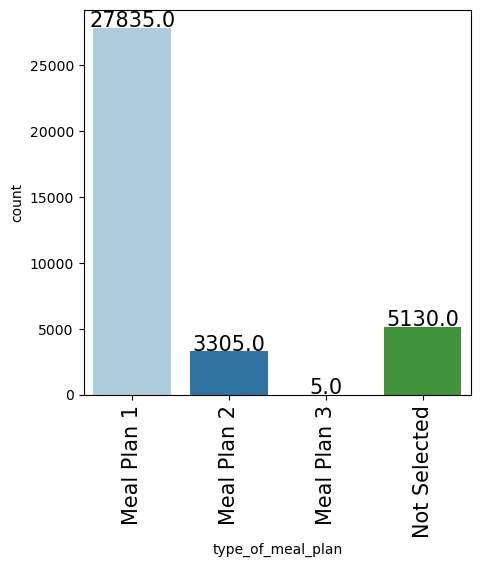

In [25]:
labeled_barplot(data,"type_of_meal_plan")

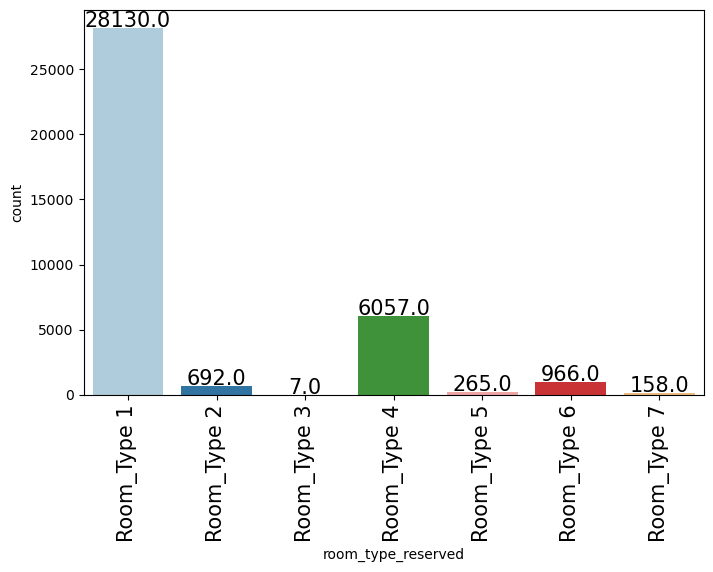

In [26]:
labeled_barplot(data,"room_type_reserved")

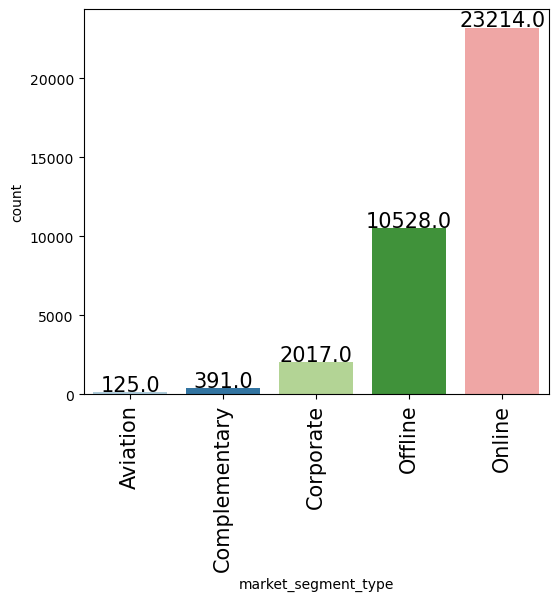

In [27]:
labeled_barplot(data,"market_segment_type")

Most of the guests book their stay by finding the rooms online. Offline is the second highest market segment.

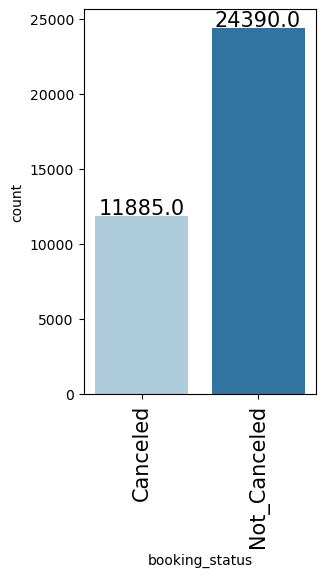

In [28]:
labeled_barplot(data,"booking_status")

In [29]:
## calculating the busiest months of the year
## the two variables of interest for this are arrival_month and booking_status
## convert canceled to 0 and not_canceled to 1

data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)


In [184]:
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()
## creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

In [185]:
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Month   12 non-null     int64
 1   Guests  12 non-null     int64
dtypes: int64(2)
memory usage: 320.0 bytes


In [32]:
## we can plot a line plot since the variable of interest is months
#monthly_data['Month'] = monthly_data['Month'].astype('category')

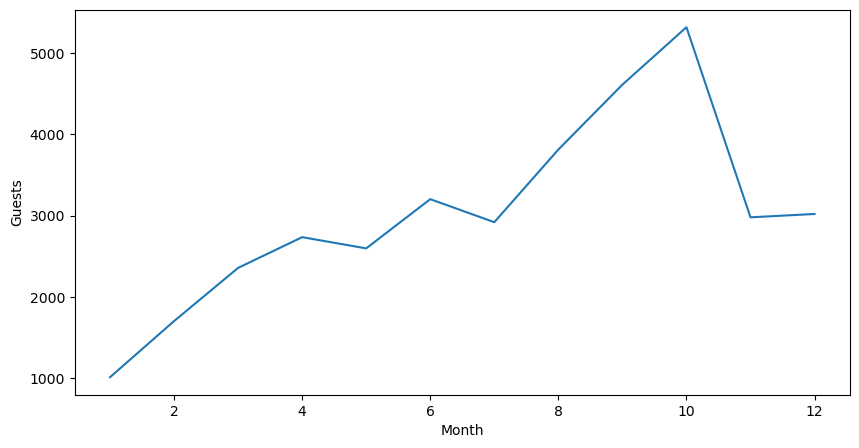

In [186]:
plt.figure(figsize=(10,5))
sns.lineplot(data = monthly_data, x='Month',y='Guests')
plt.show()

## BiVariate Analysis

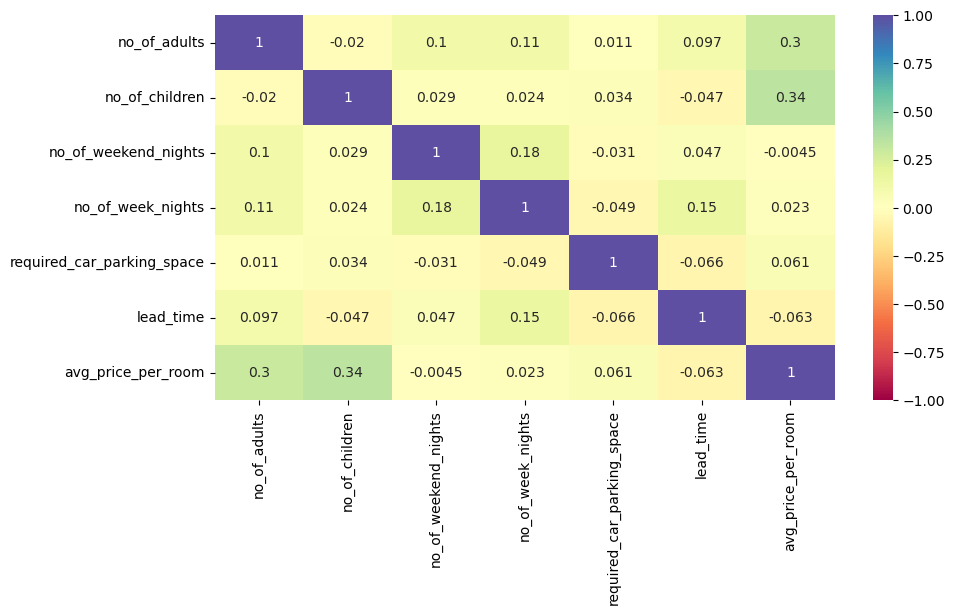

In [35]:
## Let's check the correlation between the numerical variables
data1 = data[['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','required_car_parking_space',
              'lead_time','avg_price_per_room']]
data1
plt.figure(figsize=(10,5))
sns.heatmap(data1.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

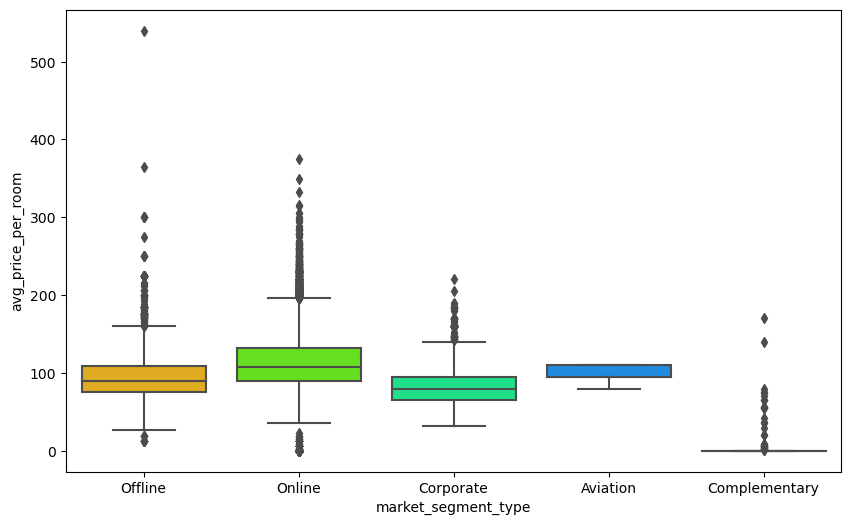

In [36]:
## how the hotel's average pricing changes based on different market segments
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

From the above graph , we can say that the online market segment type has a lot of a lot of outliers and probably a lot of variation during different seasons. The median price per room is also the highest for the online segment type.

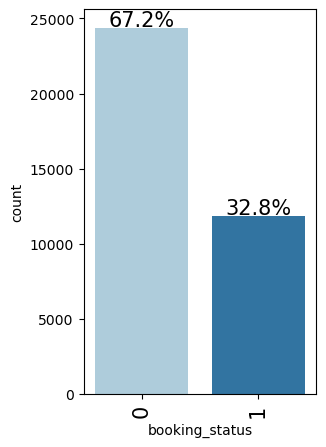

In [37]:
## percentage of bookings that are canceled
labeled_barplot(data,"booking_status",perc = True)

About 32.8% of the bookings has been canceled

In [38]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


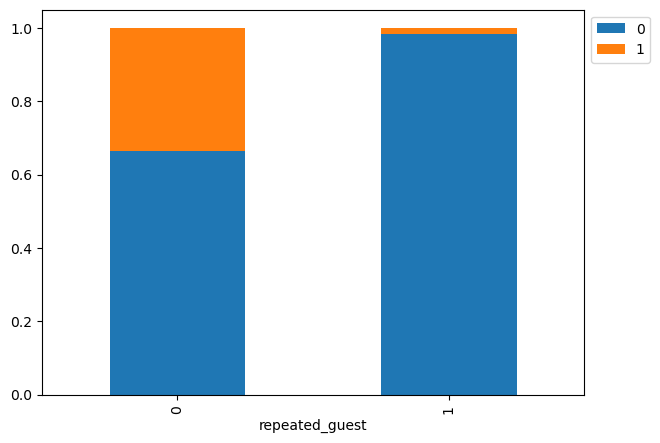

In [39]:
stacked_barplot(data,"repeated_guest","booking_status")

from this graph , you can identify that most repeated guests dont cancel after they have made their booking.

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


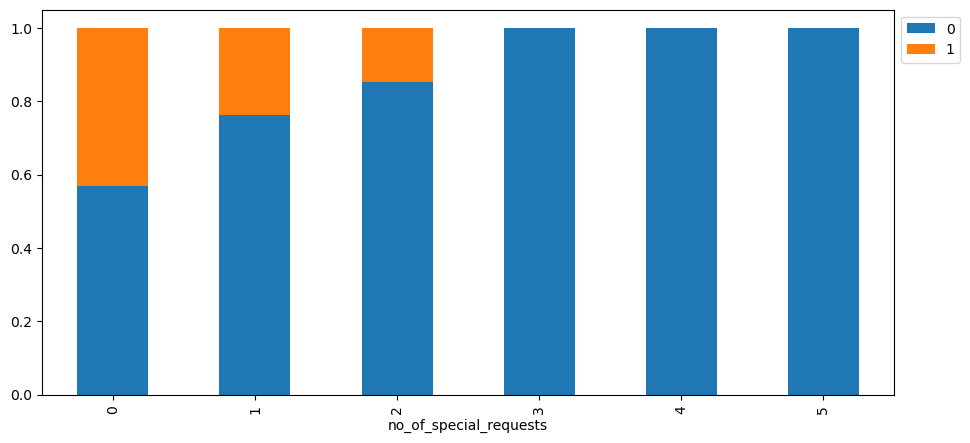

In [40]:
stacked_barplot(data,"no_of_special_requests","booking_status")

Guests who have more than 2 special requests typically dont cancel their booking. While guests with 2 special requests , there are a few cancellations. Guests with no special requests have the highest special requests cancel the most.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [41]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There are no missing values in the data

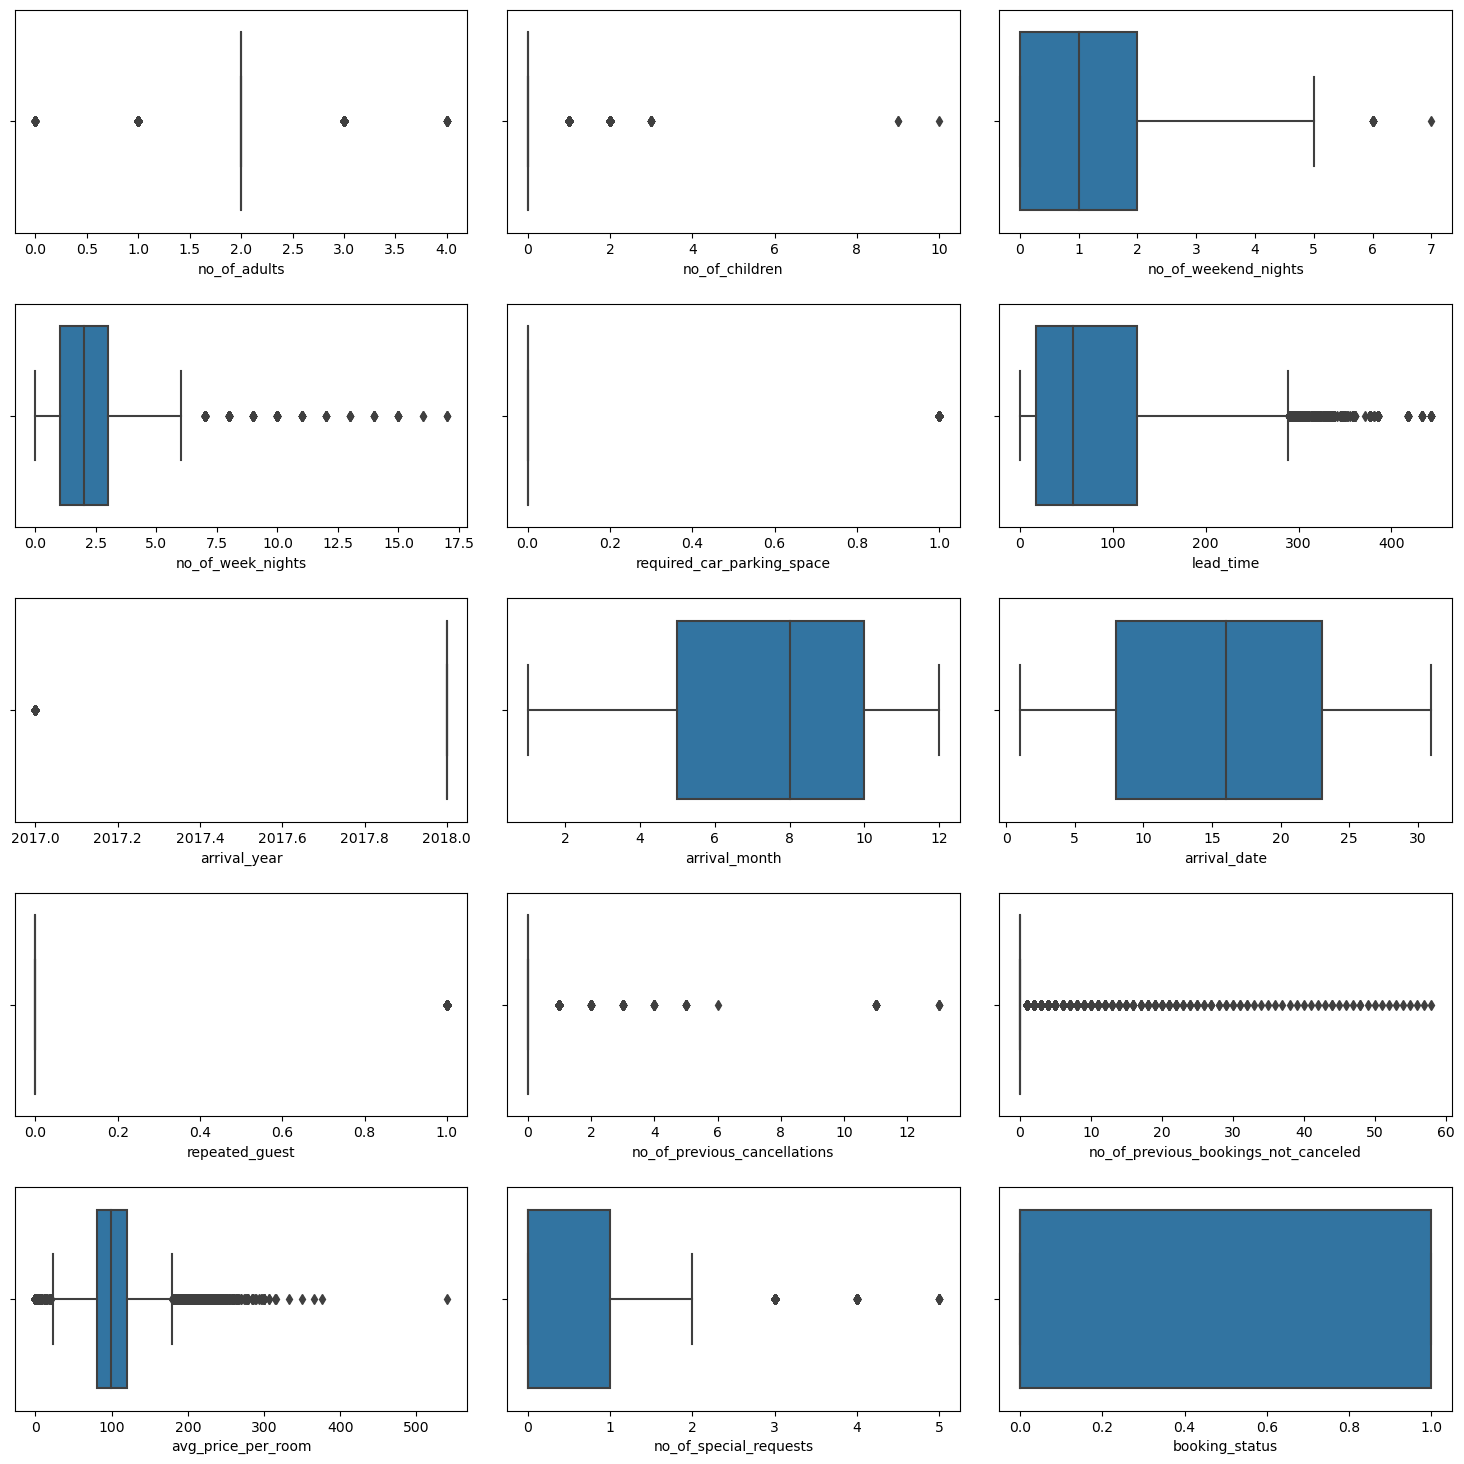

In [42]:
# outlier detection using boxplot
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=data, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [43]:
## since there are many outliers in this dataset, it could affect our model. Hence we treat it by replacing the outliers with lower and upper quartile values respectively.
def treat_outliers(data, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    data: dataframe
    col: name of the column
    """
    Q1 = data[col].quantile(0.25)  # 25th quantile
    Q3 = data[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker)

    return data


def treat_outliers_all(data, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    data: data frame
    """
    for c in col_list:
        data = treat_outliers(data, c)

    return data

In [44]:
# treating the outliers
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(data, numerical_col)

In [45]:
data.duplicated().sum()

0

we have also verified that there are no duplicates in the data

## EDA

- It is a good idea to explore the data once again after manipulating it.

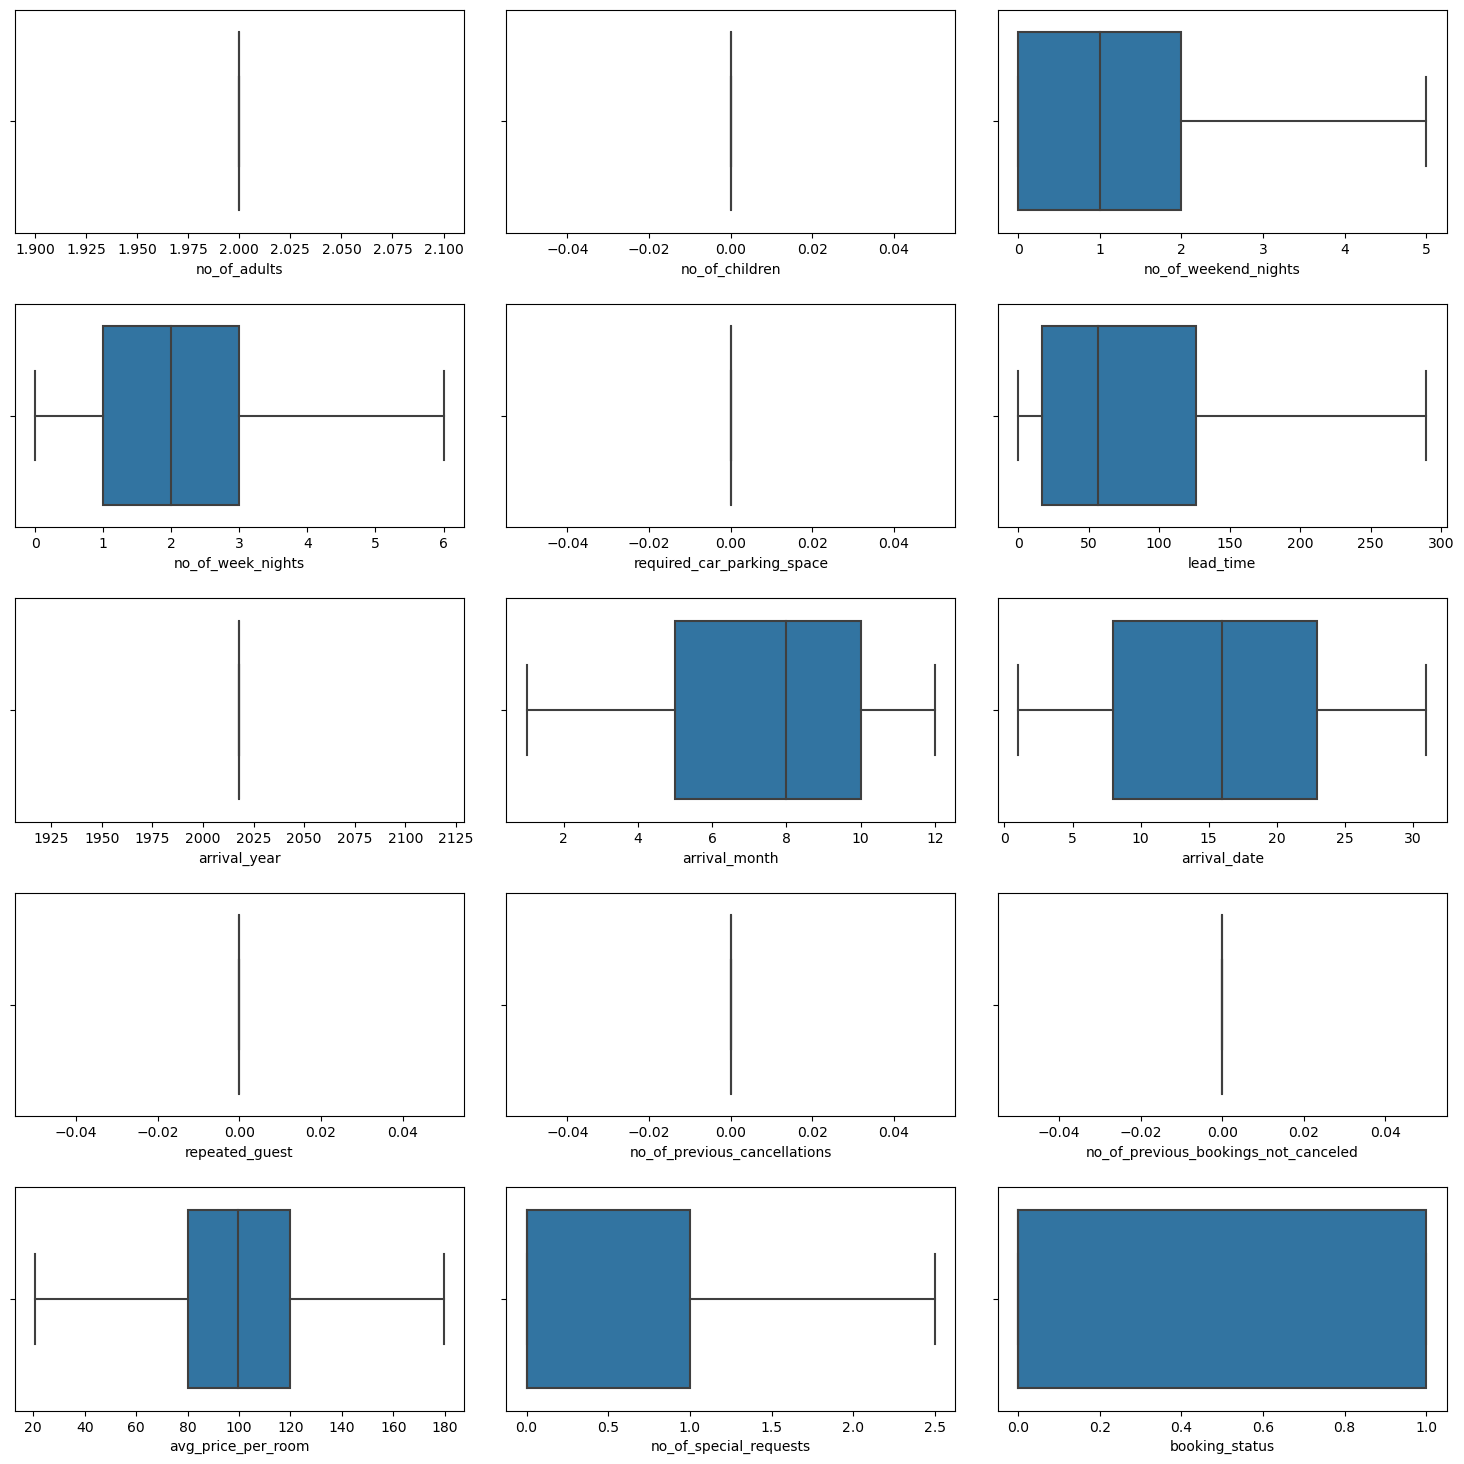

In [46]:
## we will check again if the outliers have been treated or not
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=data, x=variable)
    plt.tight_layout(pad=2)

plt.show()

## Building a Logistic Regression Model

- we build a basic logistic regression model 

In [107]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [86]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [87]:
## before we build the model , let us drop the column booking_id as it has unique values in every row and this will lead to creation of huge dataset and cause memory intake issues
data1 = data.drop("Booking_ID",axis=1)

In [88]:
data1.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224.0,2018,10,2,Offline,0,0,0,65.00,0.0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5.0,2018,11,6,Online,0,0,0,106.68,1.0,0
2,2,0,2,1,Meal Plan 1,0,Room_Type 1,1.0,2018,2,28,Online,0,0,0,60.00,0.0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211.0,2018,5,20,Online,0,0,0,100.00,0.0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48.0,2018,4,11,Online,0,0,0,94.50,0.0,1


In [89]:
X = data1.drop("booking_status", axis=1)
Y = data1["booking_status"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [90]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Number of rows in train data = 25392
Number of rows in test data = 10883
Percentage of classes in training set:
0    0.670644
1    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.676376
1    0.323624
Name: booking_status, dtype: float64


## Checking for Multicollinearity

In [93]:
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif
vif_before = calculate_vif(X_train)
print("VIF before removing variables:\n", vif_before)

VIF before removing variables:
                                 Features        VIF
0                           no_of_adults   0.000000
1                         no_of_children        NaN
2                   no_of_weekend_nights   1.048162
3                      no_of_week_nights   1.088628
4             required_car_parking_space        NaN
5                              lead_time   1.230635
6                           arrival_year   0.000000
7                          arrival_month   1.049025
8                           arrival_date   1.005723
9                         repeated_guest        NaN
10          no_of_previous_cancellations        NaN
11  no_of_previous_bookings_not_canceled        NaN
12                    avg_price_per_room   1.756597
13                no_of_special_requests   1.225081
14         type_of_meal_plan_Meal Plan 2   1.196868
15         type_of_meal_plan_Meal Plan 3   1.024311
16        type_of_meal_plan_Not Selected   1.231719
17        room_type_reserved_Roo

In [94]:
vif_before = calculate_vif(X_train)[calculate_vif(X_train)["VIF"] > 5]
vif_before

,Features,VIF
24,market_segment_type_Corporate,16.734158
25,market_segment_type_Offline,63.030322
26,market_segment_type_Online,70.011755


In [95]:
col_drop = "market_segment_type_Online" #dropping the column with highest VIF
X_train1 = X_train.loc[:, ~X_train.columns.str.startswith(col_drop)]
X_test1 = X_test.loc[:, ~X_test.columns.str.startswith(col_drop)]

# Checking VIF after dropping
vif_after = calculate_vif(X_train1)
print("VIF after dropping ", col_drop)
vif_after

VIF after dropping  market_segment_type_Online


,Features,VIF
0,no_of_adults,0.000000
1,no_of_children,NaN
2,no_of_weekend_nights,1.047898
3,no_of_week_nights,1.088620
4,required_car_parking_space,NaN
5,lead_time,1.226168
6,arrival_year,0.000000
7,arrival_month,1.048696
8,arrival_date,1.005722
9,repeated_guest,NaN


In [96]:
col_drop = ["no_of_children","required_car_parking_space", "no_of_previous_cancellations","no_of_previous_bookings_not_canceled","repeated_guest"]
X_train2 = X_train1.drop(columns=col_drop)
X_test2 = X_test1.drop(columns=col_drop)

# Checking VIF after dropping
vif_after = calculate_vif(X_train2)
print("VIF after dropping ", col_drop)
vif_after

VIF after dropping  ['no_of_children', 'required_car_parking_space', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'repeated_guest']


,Features,VIF
0,no_of_adults,0.000000
1,no_of_weekend_nights,1.047898
2,no_of_week_nights,1.088620
3,lead_time,1.226168
4,arrival_year,0.000000
5,arrival_month,1.048696
6,arrival_date,1.005722
7,avg_price_per_room,1.754120
8,no_of_special_requests,1.218406
9,type_of_meal_plan_Meal Plan 2,1.196794


In [100]:
# adding constant
X = sm.add_constant(X)

# splitting in training and test set
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## Model performance evaluation

In [101]:
logit = sm.Logit(y_train, X_train2.astype(float))
lg = logit.fit(disp=False)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                  0.3187
Time:                        16:28:26   Log-Likelihood:                -10963.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
no_of_adults                       1.225e-06   1.21e+05   1.02e-11      1.000   -2.37e+05    2.37e+05
no_of_weekend_nights                  0.1186      0.019      6

C:\Users\samyu\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [82]:
## using a loop to remove variables with p values > 0.05
# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train2[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

C:\Users\samyu\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\samyu\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['no_of_weekend_nights', 'lead_time', 'arrival_year', 'arrival_month', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


The above attributes mentioned are the significant columns. The loop has also removed the constant but we will need it for the logistic model. We will retain the constant along with other significant variables

In [98]:
# adding constant
X = sm.add_constant(X)

# splitting in training and test set
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [102]:
# creating a new training set
X_train3 = X_train2[
    [
        "no_of_weekend_nights",
        "lead_time",
        "arrival_year",
        "arrival_month",
        "avg_price_per_room",
        "no_of_special_requests",
        "type_of_meal_plan_Not Selected",
        "room_type_reserved_Room_Type 2",
        "room_type_reserved_Room_Type 4",
        "room_type_reserved_Room_Type 5",
        "room_type_reserved_Room_Type 6",
        "room_type_reserved_Room_Type 7",
        "market_segment_type_Corporate",
        "market_segment_type_Offline"
    ]
].astype(float)

In [103]:
logit3 = sm.Logit(y_train, X_train3)
lg3 = logit3.fit(disp=False)
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25378
Method:                           MLE   Df Model:                           13
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                  0.3176
Time:                        16:31:33   Log-Likelihood:                -10981.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
no_of_weekend_nights               0.1251      0.019      6.456      0.000       0.087       0.163
lead_time                          0.0171      0.000     66.344      0.

Now no feature has p-value greater than 0.05, so we'll consider the features in X_train3 as the final ones and lg3 as final model.

Coefficient of no_of_weekend_nights,lead_time,avg_price_per_room,type_of_meal_plan_Not Selected is positive; an increase in these will lead to an increase in chances of a customer cancelling the booking.
Coefficients of arrival_year,arrival_month,no_of_special_requests and room_type_reserved is negative; an increase in these will lead to a decrease in chances of a customer cancelling the booking.

## Converting coefficients to odds

The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
Therefore, odds = exp(b)
The percentage change in odds is given as odds = (exp(b) - 1) * 100

In [104]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

,no_of_weekend_nights,lead_time,arrival_year,arrival_month,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,1.133221,1.017276,0.998529,0.940565,1.022439,0.227708,1.451485,0.715281,0.774521,0.518123,0.562791,0.568779,0.359914,0.169225
Change_odd%,13.322057,1.727624,-0.147067,-5.943460,2.243931,-77.229186,45.148464,-28.471942,-22.547913,-48.187739,-43.720897,-43.122083,-64.008611,-83.077519


## Coefficient interpretations
no. of weekend nights: Holding all other features constant a unit change in weekend nights will increase the odds of a customer cancelling the booking by 1.13 times or 13.32% increase in odds.
lead_time: Holding all other features constant a unit change in weekend nights will increase the odds of a customer cancelling the booking by 1.01 times or 1.72% increase in odds
Interpretation for other attributes can be done similarly

#### Checking model performance on the training set

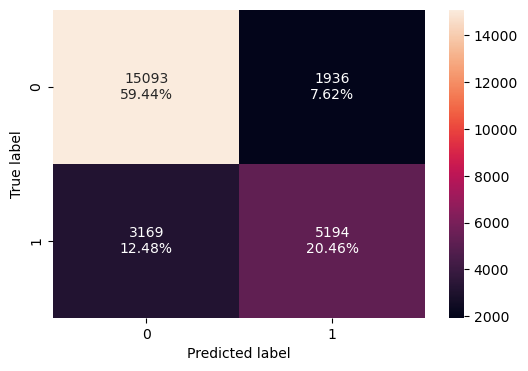

In [105]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train)

In [111]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train3, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.798952,0.621069,0.728471,0.670496


### ROC AUC on Training Set

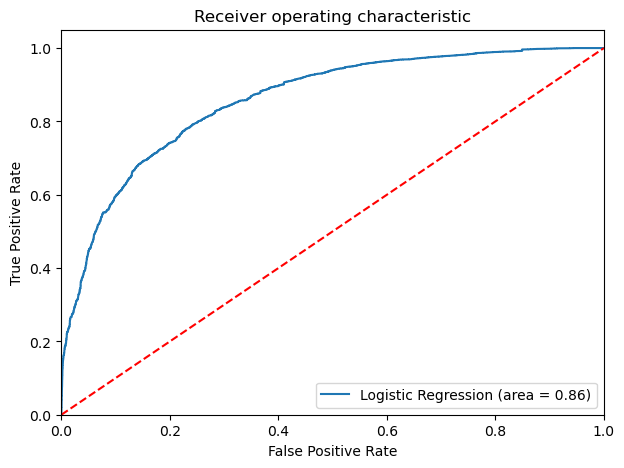

In [112]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [113]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.31726828188630224


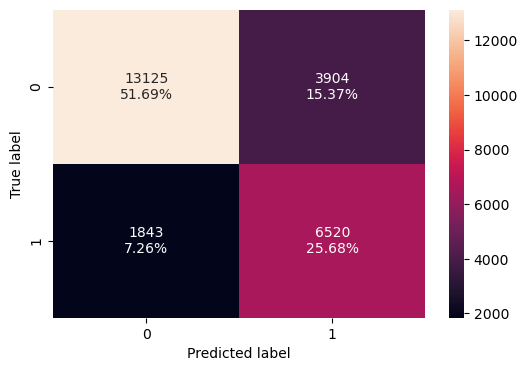

In [114]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)

In [115]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.773669,0.779625,0.62548,0.694097


Recall has incresed to 77% than the initial 62% , precision has also reduced to 62% from 72%. The accuracy has gone down a little by 2% compared to the initial model

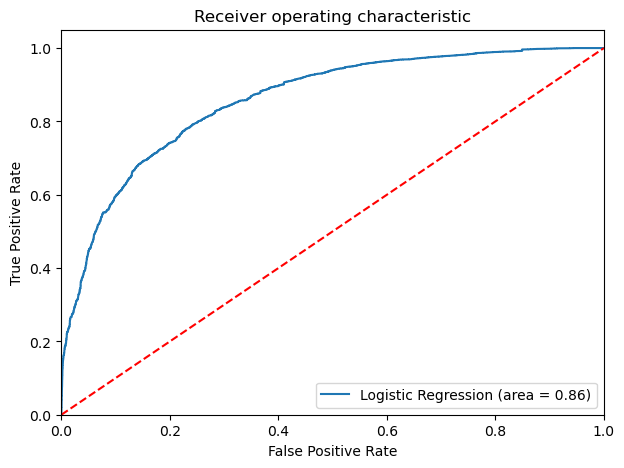

In [116]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

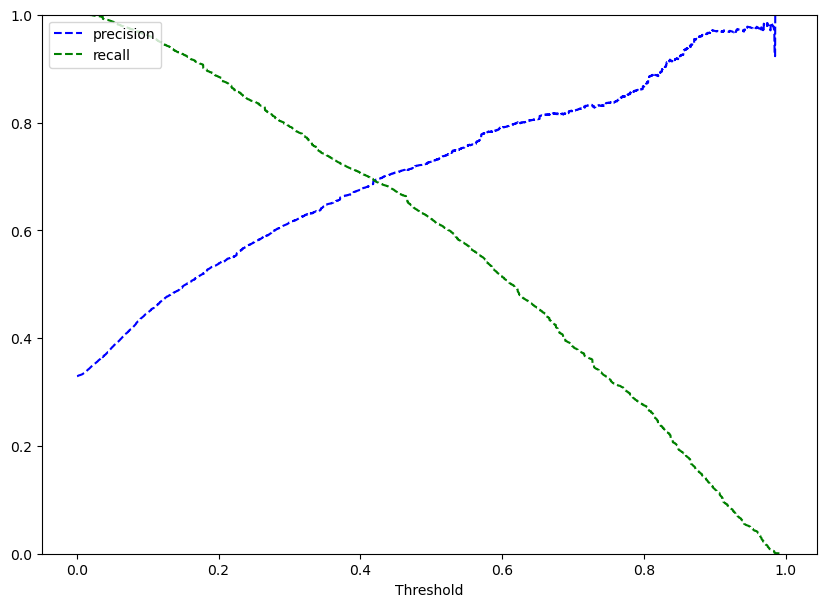

In [117]:
## lets use precision recall curve and see if we can find a better threshold
y_scores = lg3.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

At threshold of 0.41 , the precision and recall are the same. At around 0.36 , we will get better recall and still a good precision

In [122]:
# setting the threshold
optimal_threshold_curve = 0.42

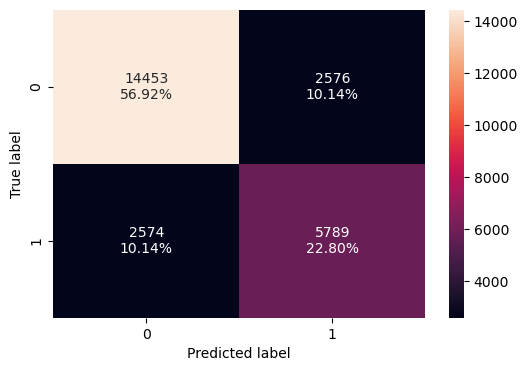

In [123]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train, threshold=optimal_threshold_curve)

In [124]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79718,0.692216,0.69205,0.692133


Recall has improved from the initial model

### Model Performance Summary

In [129]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.31 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression statsmodel,Logistic Regression-0.31 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.798952,0.773669,0.797180
Recall,0.621069,0.779625,0.692216
Precision,0.728471,0.625480,0.692050
F1,0.670496,0.694097,0.692133


### Check the performance on the test set

In [126]:
X_test3 = X_test[X_train3.columns].astype(float)

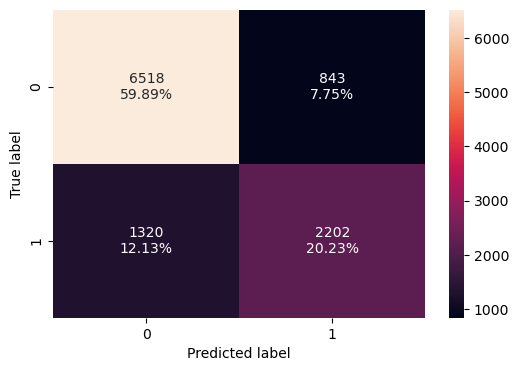

In [127]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test)

In [130]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test3, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80125,0.625213,0.723153,0.670626


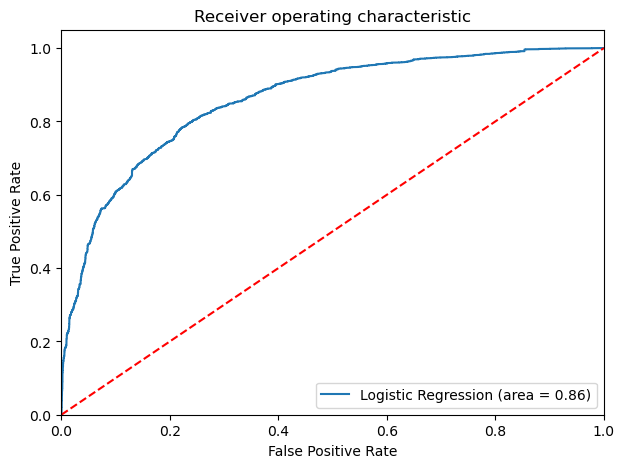

In [131]:
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Using a model with threshold = 0.31

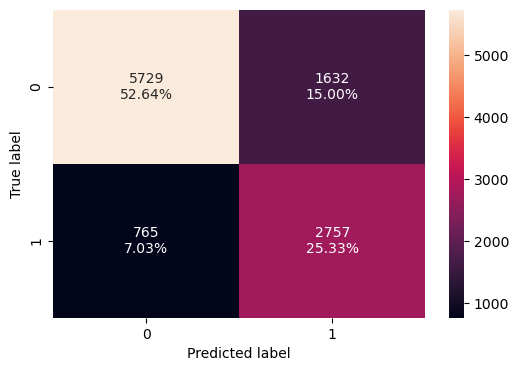

In [132]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc)

In [133]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.779748,0.782794,0.628161,0.697004


#### Using a model with threshold of 0.42

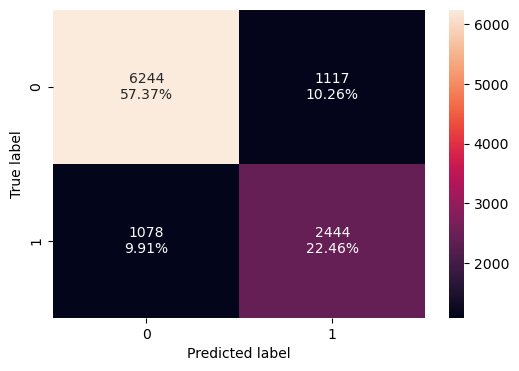

In [134]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_curve)

In [135]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.798309,0.693924,0.686324,0.690103


## Final Model Summary

In [136]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.31 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression statsmodel,Logistic Regression-0.27 Threshold,Logistic Regression-0.36 Threshold
Accuracy,0.798952,0.773669,0.797180
Recall,0.621069,0.779625,0.692216
Precision,0.728471,0.625480,0.692050
F1,0.670496,0.694097,0.692133


In [137]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.31 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression statsmodel,Logistic Regression-0.31 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.801250,0.779748,0.798309
Recall,0.625213,0.782794,0.693924
Precision,0.723153,0.628161,0.686324
F1,0.670626,0.697004,0.690103


## Building a Decision Tree model

In [139]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train3, y_train)

DecisionTreeClassifier(random_state=1)

### Model performance evaluation

### Model can make wrong predictions as:
 
1. Predicting a customer will not cancel his bookings but in reality the customer would cancel his hotel bookings.

2. Predicting a customer will cancel his bookings but in reality the customer would not cancel his bookings. 


### Which case is more important? 

* If we predict that customer will cancel his bookings and he does not cancel ,then the hotel would lose a new customer segment.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

In [140]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [141]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Checking model performance on training set

In [142]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train3, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.990627,0.976324,0.995125,0.985635


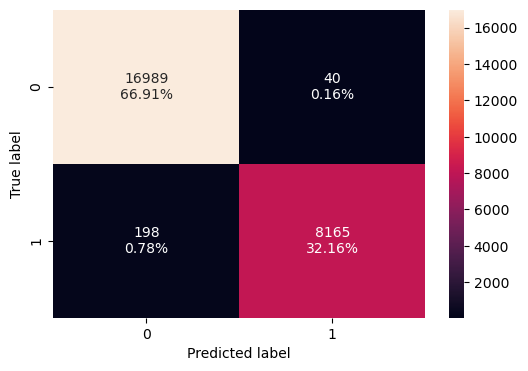

In [144]:
confusion_matrix_sklearn(model, X_train3, y_train)

### Checking model performance on test set

In [145]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test3, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.861711,0.78904,0.784807,0.786918


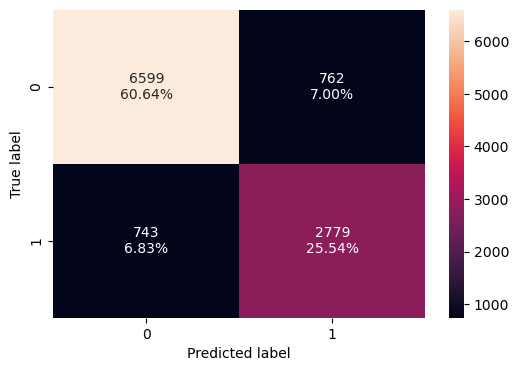

In [146]:
confusion_matrix_sklearn(model, X_test3, y_test)

### Visualizing the trees

In [153]:
column_names = list(X_train3.columns)
feature_names = column_names
print(feature_names)

['no_of_weekend_nights', 'lead_time', 'arrival_year', 'arrival_month', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


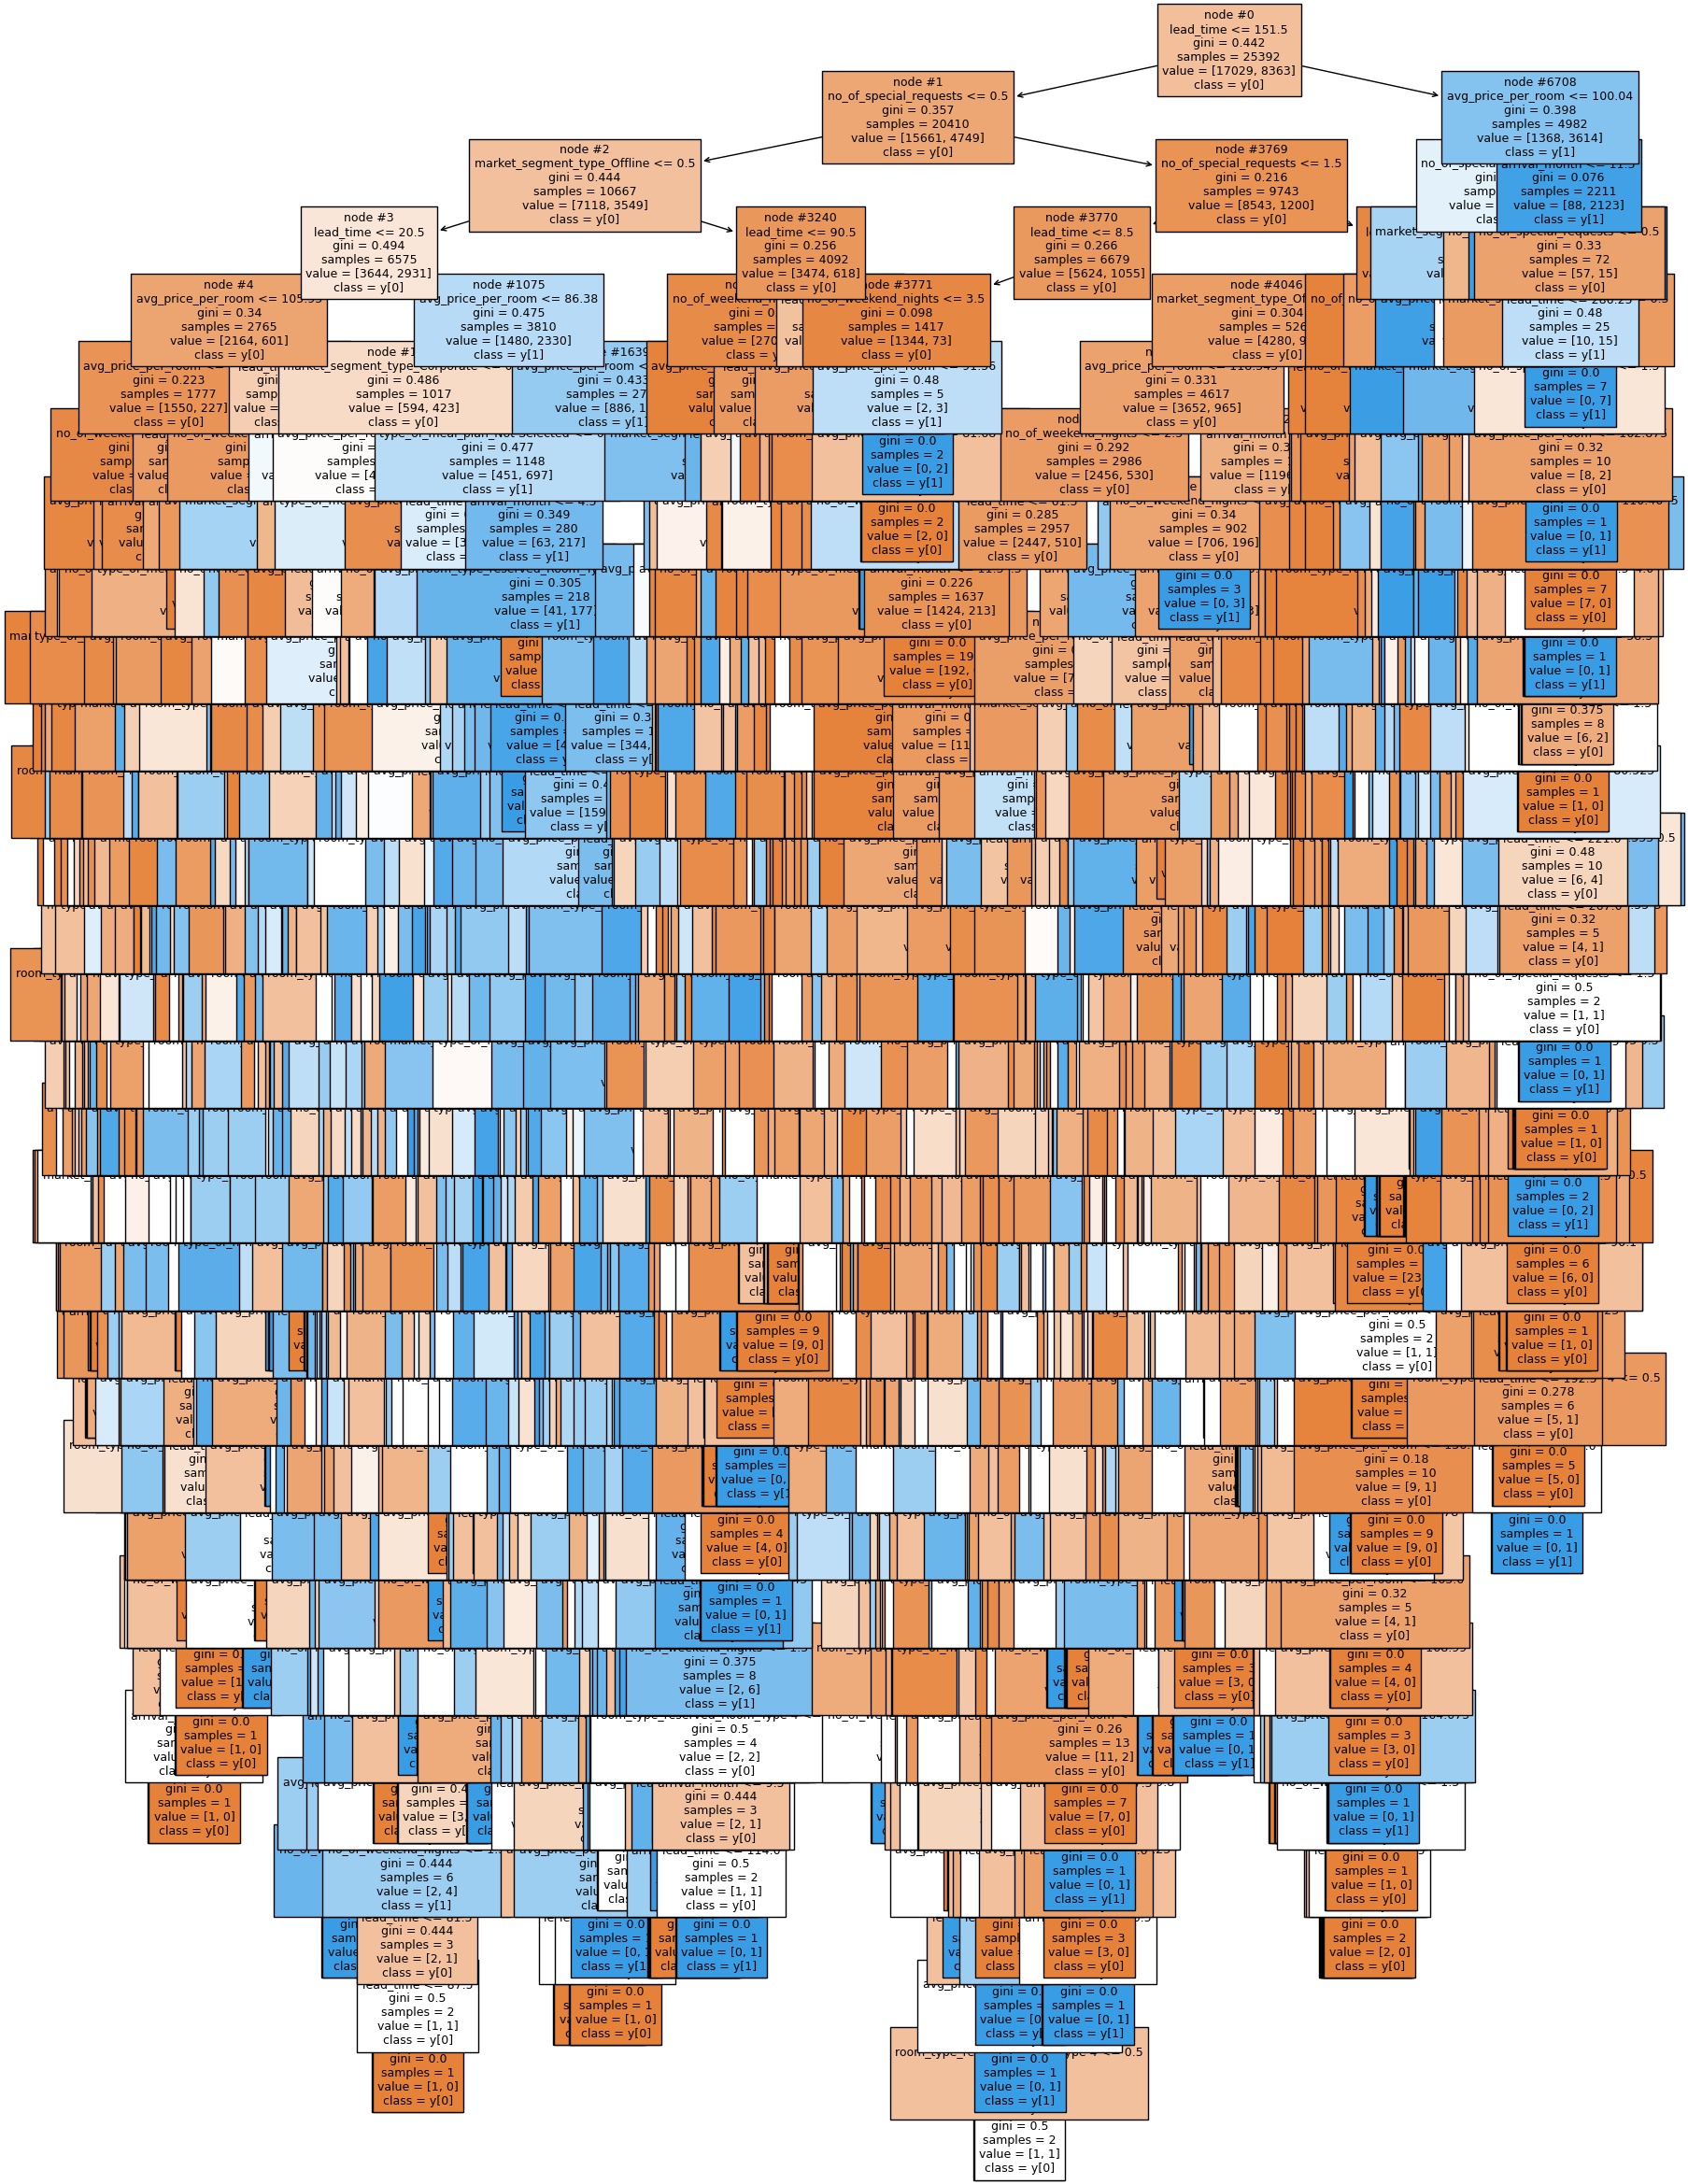

In [152]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [154]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |--- lead_time <= 20.50
|   |   |   |   |--- avg_price_per_room <= 105.95
|   |   |   |   |   |--- avg_price_per_room <= 78.90
|   |   |   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 74.59
|   |   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 70.05
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [230.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  70.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 55.50
|   |   |   |   |   |   |   |   |   

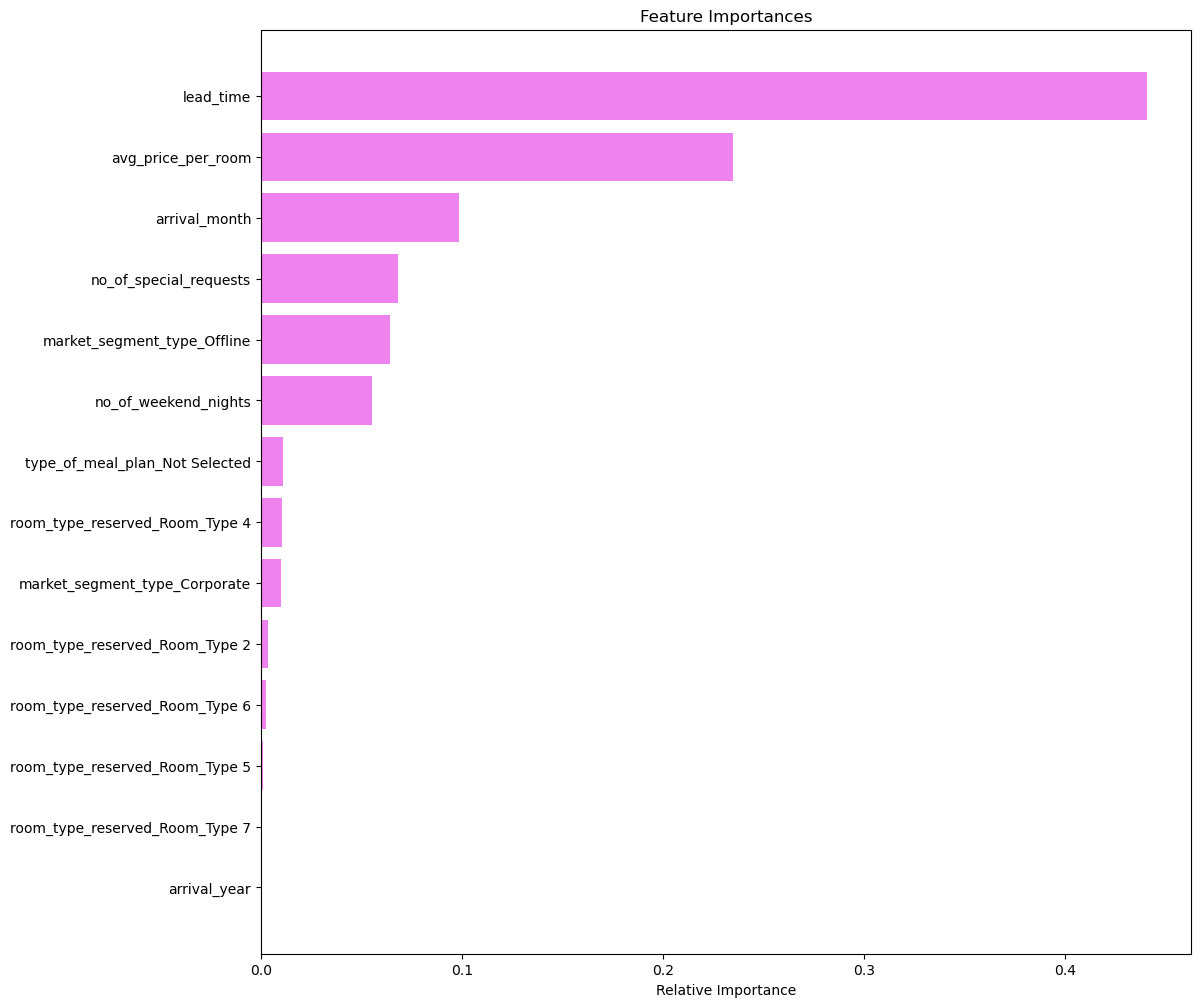

In [155]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Do we need to prune the tree?

In [158]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train3, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train3, y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=1e-05,
                       random_state=1)

### Checking performance on training set

In [159]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train3, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.990509,0.975966,0.995123,0.985451


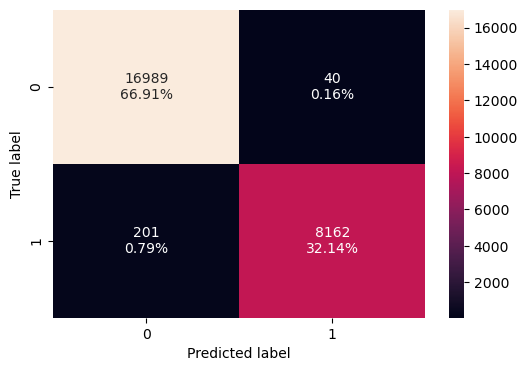

In [161]:
confusion_matrix_sklearn(estimator, X_train3, y_train)

### Model performance on test set

In [162]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test3, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.867224,0.793583,0.795616,0.794598


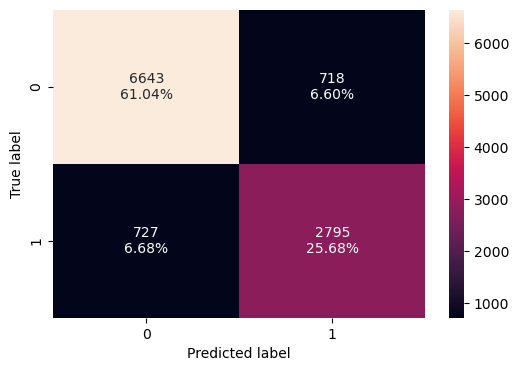

In [163]:
confusion_matrix_sklearn(estimator, X_test3, y_test)

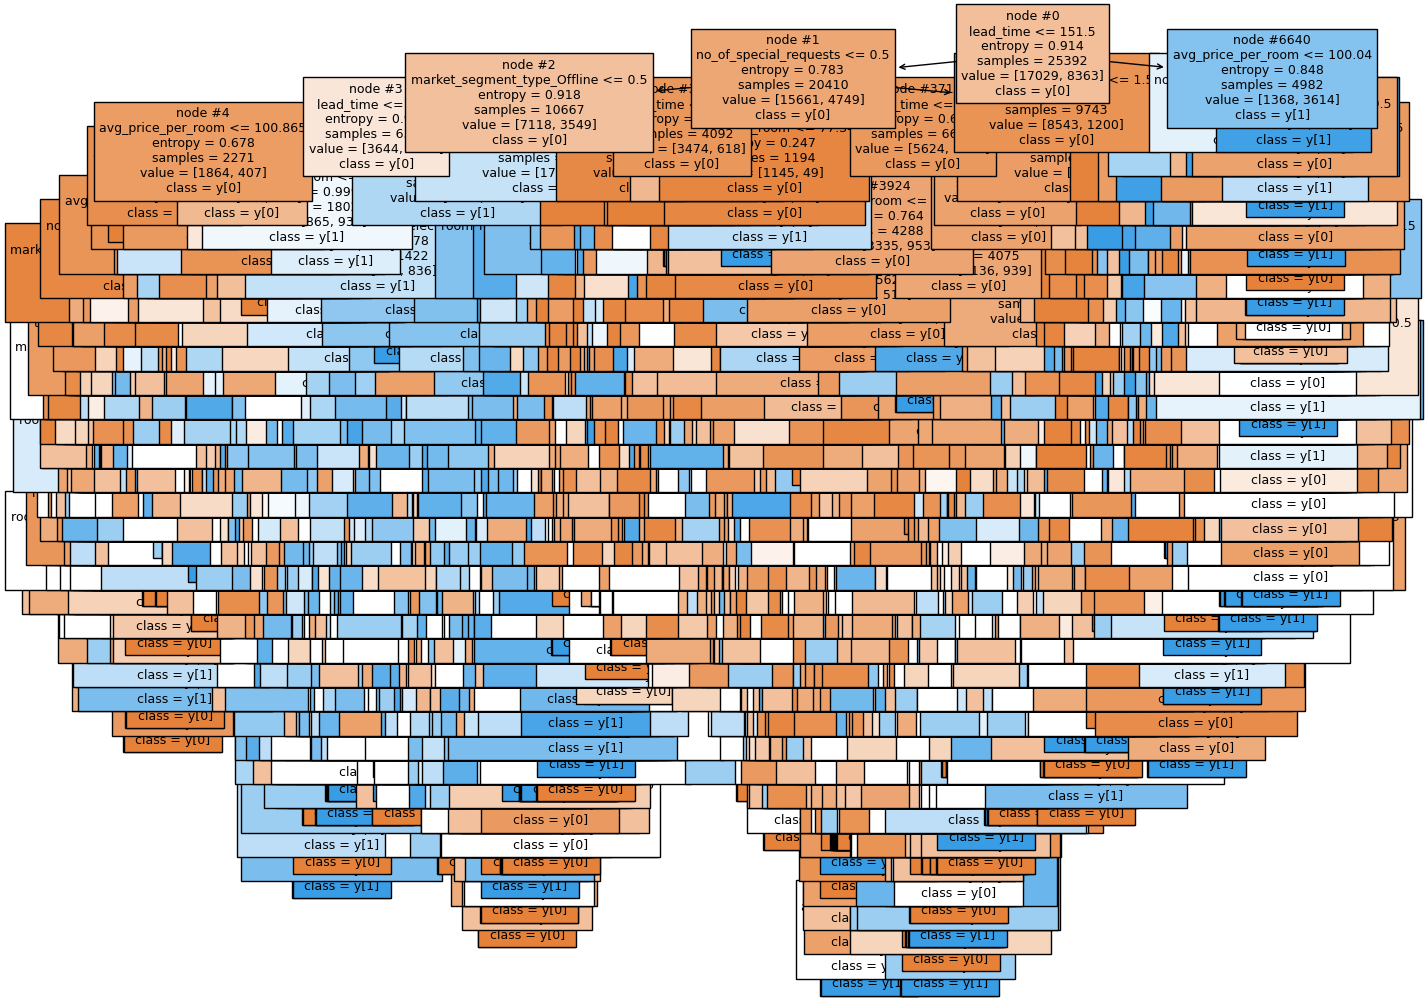

In [164]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

### Cost Complexity Pruning

In [165]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train3, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [166]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.011607
1,0.000000e+00,0.011607
2,0.000000e+00,0.011607
3,1.875356e-07,0.011607
4,2.072762e-07,0.011607
...,...,...
1511,4.542523e-03,0.280279
1512,6.582273e-03,0.293443
1513,1.725993e-02,0.310703
1514,1.815996e-02,0.365183


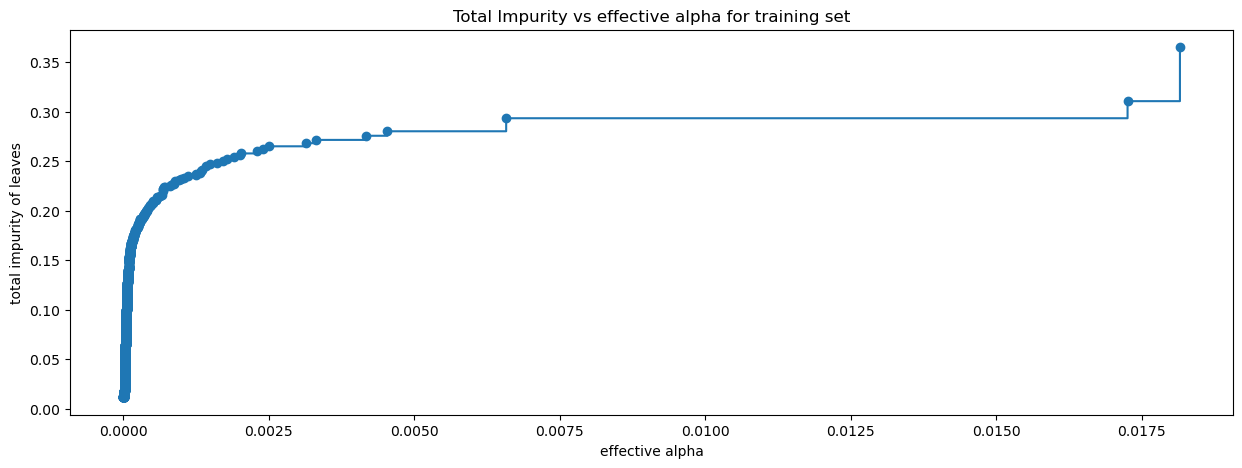

In [167]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [168]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train3, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07657789477371368


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases

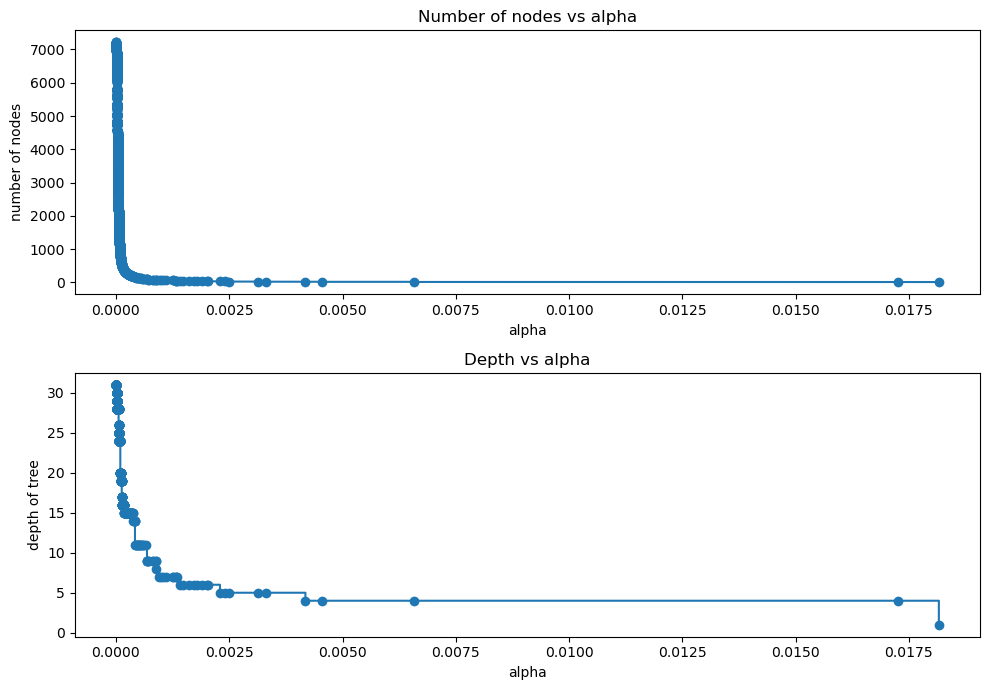

In [169]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall vs alpha for training and testing sets

In [170]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train3)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [171]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test3)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

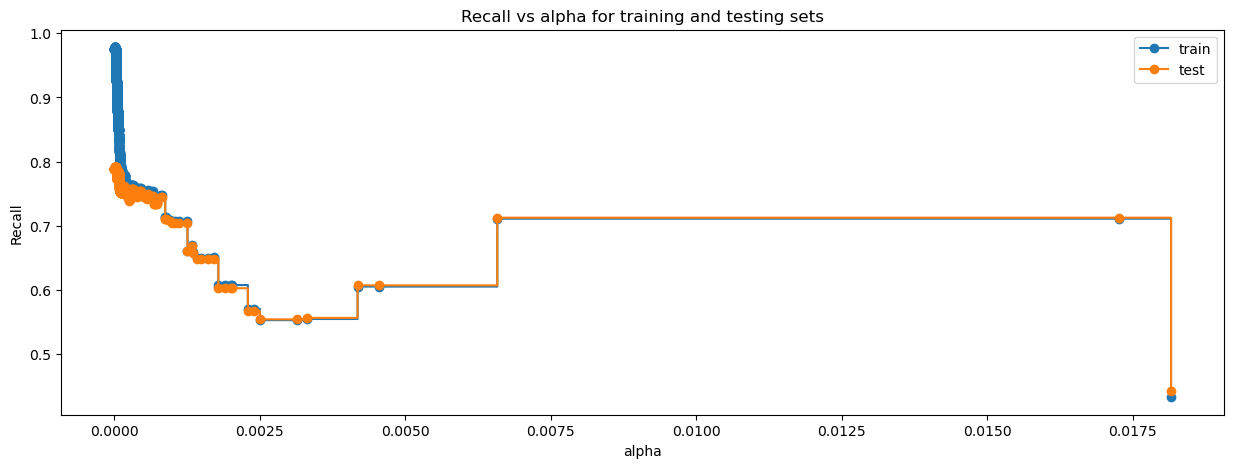

In [172]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [173]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=1.9691241335853813e-05, random_state=1)


### Checking model performance on Training Set

In [174]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train3, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.990036,0.977281,0.992351,0.984758


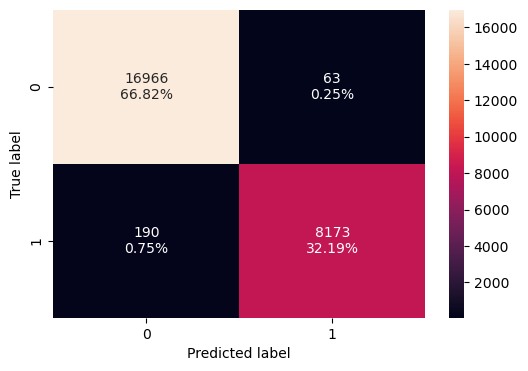

In [175]:
confusion_matrix_sklearn(best_model, X_train3, y_train)

### Model Performance on the Test Set

In [176]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test3, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.861895,0.790744,0.784286,0.787502


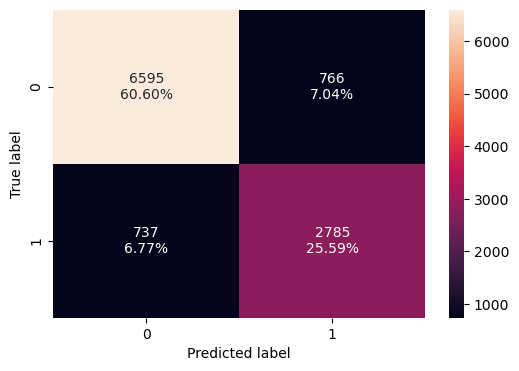

In [177]:
confusion_matrix_sklearn(best_model, X_test3, y_test)

### Visualizing the Decision Tree

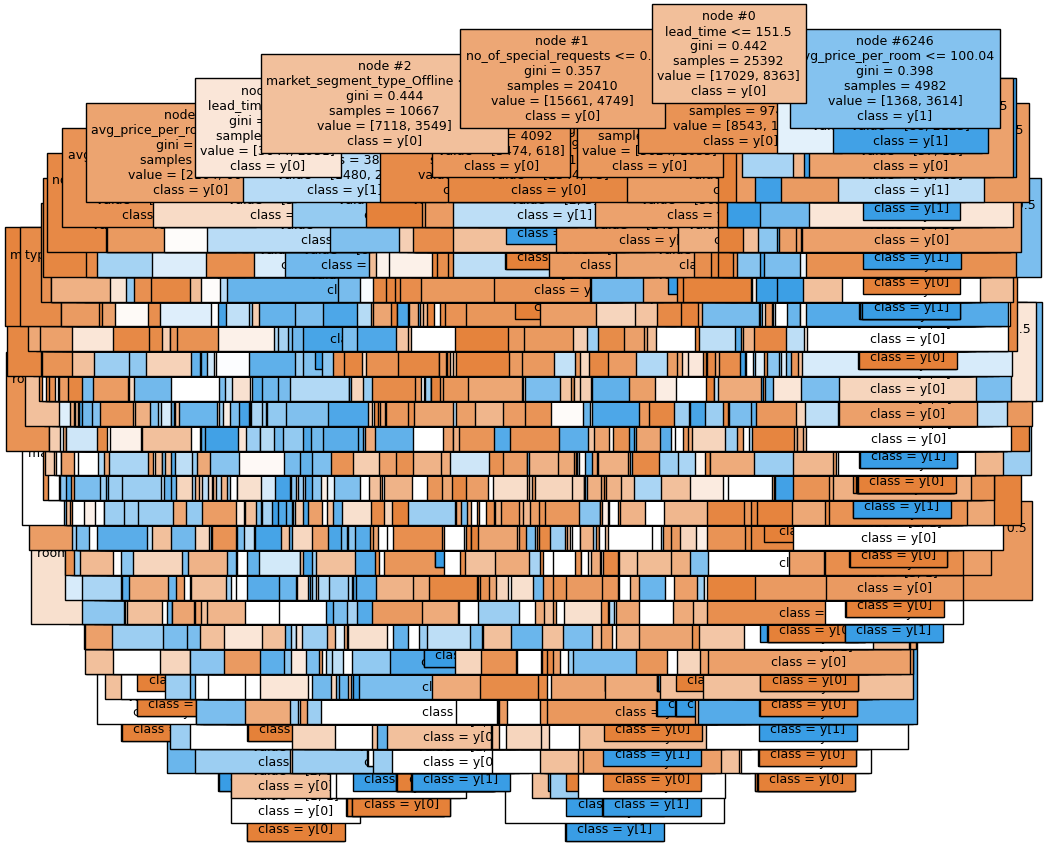

In [178]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [179]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |--- lead_time <= 20.50
|   |   |   |   |--- avg_price_per_room <= 105.95
|   |   |   |   |   |--- avg_price_per_room <= 78.90
|   |   |   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 74.59
|   |   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 70.05
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [230.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  70.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 55.50
|   |   |   |   |   |   |   |   |   

In [180]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train3.columns
    ).sort_values(by="Imp", ascending=False)
)

                                     Imp
lead_time                       0.440973
avg_price_per_room              0.234179
arrival_month                   0.097838
no_of_special_requests          0.068693
market_segment_type_Offline     0.064595
no_of_weekend_nights            0.055006
type_of_meal_plan_Not Selected  0.011056
room_type_reserved_Room_Type 4  0.010347
market_segment_type_Corporate   0.009775
room_type_reserved_Room_Type 2  0.003385
room_type_reserved_Room_Type 6  0.002395
room_type_reserved_Room_Type 5  0.001246
room_type_reserved_Room_Type 7  0.000513
arrival_year                    0.000000


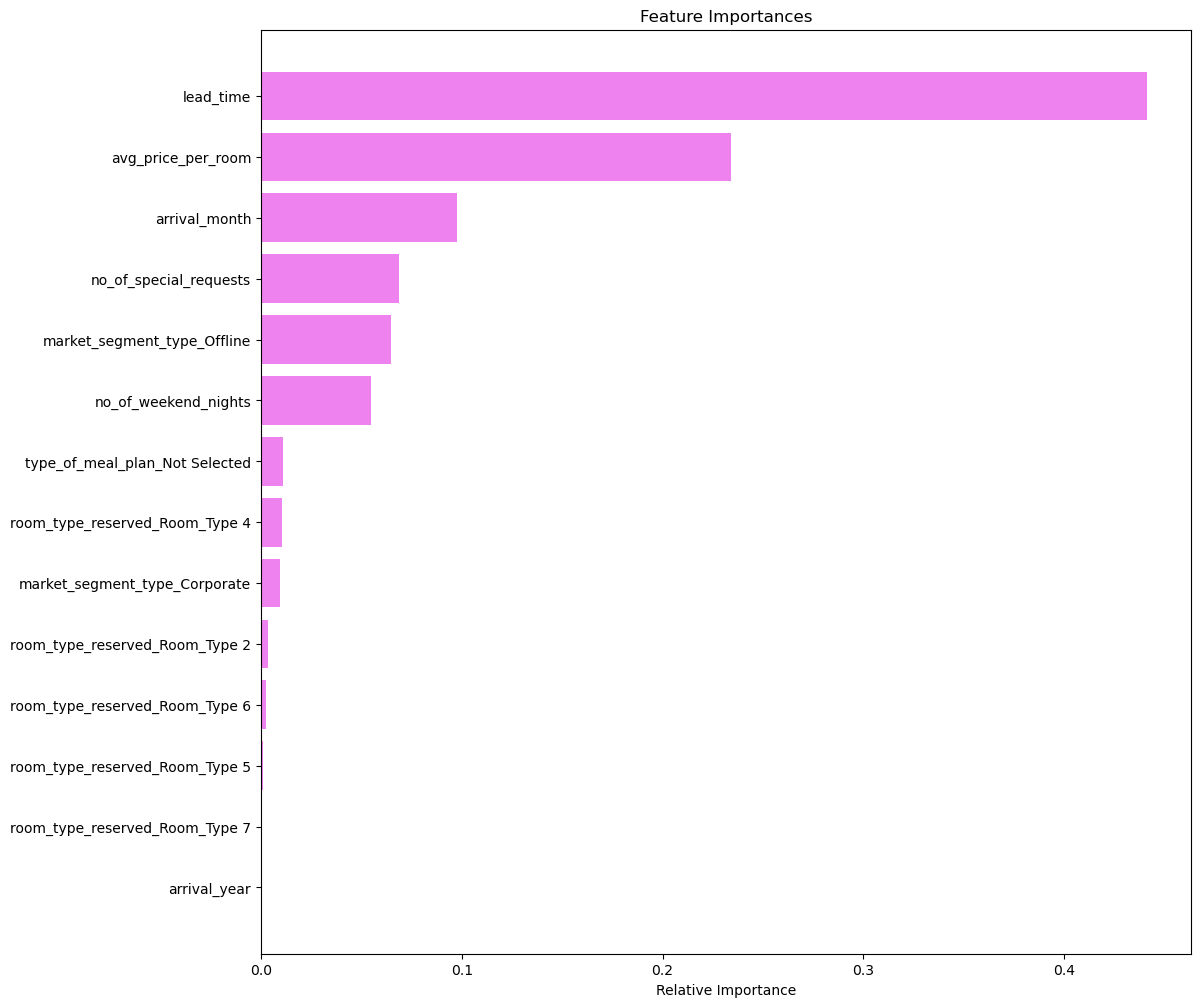

In [181]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Conclusions

In [182]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.990627,0.990509,0.990036
Recall,0.976324,0.975966,0.977281
Precision,0.995125,0.995123,0.992351
F1,0.985635,0.985451,0.984758


In [183]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.861711,0.867224,0.861895
Recall,0.789040,0.793583,0.790744
Precision,0.784807,0.795616,0.784286
F1,0.786918,0.794598,0.787502


## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

The model with a threshold of 0.42 performs better than the other models across multiple evaluation metrics, such as accuracy, precision, recall, and F1 score. Therefore, it is recommended as the optimal choice for accurate cancellation predictions.

Among the different decision tree models tested, the one with pre-pruning has the highest recall on the test set even though the variation is not much among other models. Recall measures the model's ability to correctly identify actual booking cancellations. A higher recall suggests that the model is more effective at capturing real cancellations. The recommended model is the decision tree with post-pruning for maximizing the detection of booking cancellations

The hotel can offer a refund policy where the amount decreases as the check-in date approaches. This may encourage guests to cancel well in advance, giving the hotel an opportunity to rebook the room.

Also, it could include an option to modify the booking that allows the customer to make changes up to a certain day before check-in, this may prevent cancellations when they just want changes in the reservation.

The hotel may consider paying special attention to Lead time, Online market segment and average price per room because according to the decision tree model thore are the most important variables in determining if a booking will be cancelled.

The prices of rooms in different market segments can vary significantly. In particular, the online market segment, which makes up the majority of our guests at 64%, generally has higher prices compared to other segments. This could happen for the dynamics of online booking platforms who offer convenience, an extensive range of options, and easy price comparison. By recognizing this trend, the marketing team can take advantage of the opportunity to attract more customers.

From the analysis of the data, it is clear that there is a seasonal pattern in the booking behavior. The number of bookings starts to increase from August, reaching its peak in October with 5317 bookings. This period likely corresponds to a popular travel season or event. After October, the number of bookings gradually decreased, with November still showing a relatively high number of bookings (2980). However, there is a significant decline in December, January, and February, with January having the lowest number of bookings (1014).

The marketing team can take advantage of this trend by designing a strong campaign to increase bookings during the winter season. They can achieve this by offering appealing deals that attract more customers, resulting in higher occupancy rates.
Also by aligning business decisions with booking patterns, hotels can effectively allocate resources and optimize operations year-round. During busy times, hiring extra staff is important to provide great customer service and handle the increased demand efficiently. In contrast, during slower periods, adjusting staffing levels and optimizing operations can help manage costs while still delivering a high level of service.

According to the analysis repeated guests are less likely to cancel a booking, implement a loyalty program that offers benefits and rewards to these customers can encourage guests to choose your hotel for future stays and reduce the likelihood of cancellations.

INN Hotels should keep getting data and making further analysis about the reasons customers have to cancel and also .